# Model Training

We are using the basic features derived from the `basic_featureset_constructor.py` script.

For full description of the data and the schema used, please refer to the README.md file in this directory and `basic_featureset_constructor.py`.

In [1]:
# perform imports
import numpy as np
import pandas as pd

# read in the data and establish the headers
headers = [
    "label",
    "video_url",
    "mean_0",
    "mean_1",
    "mean_2",
    "var_0",
    "var_1",
    "var_2",
    "kurt_0",
    "kurt_1",
    "kurt_2",
    "skew_0",
    "skew_1",
    "skew_2",
    "mfcc_0",
    "mfcc_1",
    "mfcc_2",
    "mfcc_3",
    "mfcc_4",
    "mfcc_5",
    "mfcc_6",
    "mfcc_7",
    "mfcc_8",
    "mfcc_9"
]
data_path = "basic_image_mfcc.csv"
df = pd.read_csv(data_path,
                names=headers)
df



,label,video_url,mean_0,mean_1,mean_2,var_0,var_1,var_2,kurt_0,kurt_1,...,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9
0,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.179709,-0.358271,-0.243599,0.061027,0.078090,0.081538,0.762071,0.427525,...,-389.08105,69.325640,23.856760,32.010990,4.376157,25.073677,-4.535764,25.766470,-3.678861,21.793873
1,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.169304,-0.349189,-0.233577,0.062205,0.080310,0.083866,0.743247,0.393108,...,-388.20624,68.423930,24.904810,31.749805,4.300865,25.330350,-4.227099,27.084194,-3.032256,23.718094
2,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.167502,-0.345530,-0.230784,0.063220,0.082186,0.085220,0.651651,0.343040,...,-396.25903,74.661940,19.866194,34.008972,1.085095,25.776570,-4.483851,25.109749,-1.393035,22.675234
3,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.164594,-0.344186,-0.228439,0.062253,0.081140,0.084441,0.642769,0.320820,...,-393.23810,72.993310,22.426033,33.250664,4.217236,26.205458,-2.451353,23.444273,0.181036,21.257542
4,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.162209,-0.340821,-0.225101,0.063879,0.083065,0.086120,0.617978,0.305115,...,-394.53204,77.053406,22.420502,35.900852,3.672092,27.669510,-3.112052,26.587683,-0.698880,22.898570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.158020,-0.313289,-0.183371,0.068098,0.092186,0.092834,0.813068,0.189485,...,-395.84546,65.371544,17.106707,28.291910,-4.119839,23.006813,-11.364814,24.569206,-8.562061,21.990053
8027,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.177442,-0.329579,-0.203504,0.065243,0.088330,0.089558,0.887128,0.232355,...,-403.42303,74.720430,8.443128,33.527040,-7.147444,23.746992,-9.603465,21.630617,-5.397158,19.206388
8028,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.181534,-0.334044,-0.208592,0.064484,0.086907,0.088279,0.956613,0.246770,...,-391.76846,60.638863,16.072222,27.853533,-2.136380,22.217745,-10.259770,24.607500,-10.496410,22.706278
8029,No_Danger,/home/matthew/Documents/GapWatch/common/data/l...,-0.182051,-0.336044,-0.209996,0.063868,0.086228,0.087489,0.962163,0.263521,...,-397.19153,68.576200,10.105254,36.294440,-7.328092,20.899412,-7.418054,23.296114,-8.382429,21.888780


## Standardise by historical mean and variance

In [2]:
def standardise_hist(row):
    '''
    helper function to do historical standardisation
    
    The data are split evenly between the classes, however this is not
    the case in real life, where the long term average will be totally dominated 
    by the "No Danger" class (in Co. Leitrim anyway...) so the long term average
    values we will experience in the field will be very close to those found
    in the "No Danger" class for that particular video.
    
    To resolve this, simply standardise using the mean and variance of the
    feature observed from "No Danger" frames from that particular video.
    '''
    video_url = row[headers[1]] # find video_url column
    num_cols = row[headers[2:len(headers)]] # find numeric columns
    hist_vals = df.loc[(df[headers[1]]==video_url)&(df[headers[0]]=="No_Danger"),headers[2:len(headers)]]
    hist_mean = np.mean(hist_vals, axis=0)
    hist_std  = np.std(hist_vals, axis=0)
    return (num_cols-hist_mean)/hist_std
df_std = df.apply(standardise_hist, axis=1, raw=False)

In [3]:
df_std.describe()

,mean_0,mean_1,mean_2,var_0,var_1,var_2,kurt_0,kurt_1,kurt_2,skew_0,...,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9
count,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,...,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000
mean,-1.769482,-1.967646,-2.051872,8.446195,4.878892,7.255087,0.779659,0.911939,-0.291305,3.642115,...,1.975790,1.489767,-0.742737,-0.524027,0.413177,1.380337,0.791654,-0.698702,-0.517165,-1.157120
std,5.511985,6.069549,6.604397,40.355815,18.253339,24.313177,13.656552,14.994227,10.203783,10.206936,...,3.778260,2.326260,1.641874,1.794184,1.476265,2.435668,2.001218,1.763709,1.454759,2.105426
min,-80.265133,-87.107360,-102.404357,-15.499977,-18.277793,-17.427260,-67.967516,-29.357764,-35.412817,-27.892360,...,-1.967593,-2.938197,-5.171507,-4.846271,-3.491157,-3.494169,-3.138642,-6.669941,-7.199782,-10.372002
25%,-1.462265,-1.496763,-1.473791,-0.571647,-0.435297,-0.417499,-0.898609,-1.149586,-0.971826,-0.379193,...,-0.401897,-0.245256,-1.533013,-1.278227,-0.650343,-0.427899,-0.373909,-1.631444,-1.222675,-2.522170
50%,-0.637898,-0.640700,-0.634283,0.300906,0.395472,0.415202,0.018809,-0.125627,-0.139593,0.676221,...,0.459331,0.614834,-0.472708,-0.291831,0.205975,0.477143,0.226479,-0.528293,-0.329518,-0.746423
75%,0.396427,0.329682,0.367675,1.811134,2.017626,2.369728,1.216433,0.805404,0.794528,2.362908,...,3.575946,3.464413,0.341110,0.596111,0.994524,2.808279,1.337478,0.515351,0.409971,0.330620
max,35.888025,42.126554,36.287158,516.745807,309.281850,297.490373,655.442549,567.432986,533.719672,147.583607,...,23.136927,7.912396,3.806704,11.219816,11.089125,14.012225,10.710157,4.096189,4.192858,3.169896


In [4]:
df.describe()

,mean_0,mean_1,mean_2,var_0,var_1,var_2,kurt_0,kurt_1,kurt_2,skew_0,...,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9
count,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,...,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000,8031.000000
mean,-0.145135,-0.287376,-0.180266,0.117430,0.124432,0.126170,0.595827,0.422567,0.315862,0.402746,...,-367.509620,87.754441,10.345012,30.714875,-2.039262,29.938277,-6.455961,22.916744,-8.097045,18.659506
std,0.137072,0.114434,0.129969,0.060775,0.062039,0.054148,0.957890,0.909274,0.808214,0.526146,...,42.364165,18.655609,9.683939,6.612301,4.457277,6.763463,7.392804,3.950652,4.283762,5.558734
min,-0.910967,-0.935287,-0.917804,0.000000,0.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.946743,...,-406.196260,48.336685,-18.904383,5.143922,-12.510475,18.750317,-15.717271,3.663604,-28.146818,-3.912170
25%,-0.250895,-0.371289,-0.282438,0.076245,0.083252,0.087028,0.026278,-0.084528,-0.081613,0.002650,...,-396.822400,74.043823,7.151517,28.330002,-5.192577,25.012656,-10.994003,20.503948,-10.209030,16.205387
50%,-0.149532,-0.288231,-0.183230,0.095323,0.099051,0.103282,0.437289,0.341554,0.210247,0.259737,...,-385.954200,79.364914,12.521852,32.132946,-3.190718,27.202309,-9.419358,23.447838,-7.337842,20.368687
75%,-0.040821,-0.204516,-0.086807,0.136027,0.145799,0.156870,0.953001,0.829477,0.653123,0.664835,...,-338.293580,106.339270,16.272928,34.725185,-0.355687,32.766060,-5.734913,25.429537,-5.833268,22.537111
max,0.923724,0.812552,0.927819,0.607956,0.489395,0.513717,30.546881,39.120921,31.969074,5.439020,...,-77.304860,177.765240,45.936584,62.439217,23.495756,48.941833,24.192429,33.315376,10.419096,29.634169


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# merge the standardised data with the labels
# should see close to zero mean and one standard deviation for No Danger for each specific video
ml_df= df_std.merge(df[headers[:2]],how="inner",left_index=True, right_index=True).dropna()
ml_df.loc[(ml_df[headers[0]]=="No_Danger")&(ml_df[headers[1]]==df.iloc[0,1]),:].describe()

,mean_0,mean_1,mean_2,var_0,var_1,var_2,kurt_0,kurt_1,kurt_2,skew_0,skew_1,skew_2,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,2.467162e-17,-3.515706e-16,-3.392348e-16,-2.775558e-16,-8.203315e-16,-4.317534e-17,-1.233581e-16,-9.251859e-17,-5.551115e-17,-2.282125e-16,-5.242720e-16,2.467162e-17,-4.004513e-14,5.692977e-15,6.969733e-16,-3.083953e-15,1.079383e-16,-8.137781e-16,-4.957454e-16,-3.355341e-15,7.083454e-18,8.110796e-16
std,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00,1.014185e+00
min,-1.211733e+00,-1.214924e+00,-1.206813e+00,-1.198689e+00,-1.185188e+00,-1.219970e+00,-1.224740e+00,-1.282275e+00,-1.286168e+00,-1.153945e+00,-1.305311e+00,-1.280806e+00,-1.594674e+00,-1.757744e+00,-1.553509e+00,-1.988065e+00,-1.315267e+00,-1.330495e+00,-1.254078e+00,-1.482772e+00,-1.506943e+00,-1.401983e+00
25%,-1.018861e+00,-1.013675e+00,-1.020284e+00,-1.022950e+00,-1.002125e+00,-1.009072e+00,-9.780659e-01,-9.686611e-01,-9.706622e-01,-9.994658e-01,-9.865215e-01,-9.865688e-01,-7.397724e-01,-9.233370e-01,-8.020136e-01,-6.435386e-01,-7.843521e-01,-7.686488e-01,-6.171786e-01,-9.285388e-01,-9.382288e-01,-9.547464e-01
50%,1.510061e-01,1.477256e-01,1.244589e-01,4.651406e-02,1.122064e-02,3.832356e-02,-3.248896e-01,-2.946755e-01,-2.728919e-01,-3.207504e-01,-3.069217e-01,-2.885968e-01,-3.323724e-02,3.491939e-02,-1.243219e-01,2.005993e-01,-2.730636e-01,-2.361180e-01,-4.234450e-01,4.808435e-02,3.116148e-02,6.457509e-02
75%,1.009596e+00,9.994939e-01,9.954036e-01,9.583353e-01,9.539862e-01,9.656108e-01,1.026098e+00,1.028194e+00,1.007576e+00,1.041446e+00,1.005539e+00,1.025286e+00,8.634029e-01,8.930510e-01,7.891122e-01,6.644020e-01,3.571789e-01,4.971541e-01,4.086984e-01,7.201146e-01,4.628412e-01,8.180857e-01
max,1.364907e+00,1.371296e+00,1.383197e+00,1.480199e+00,1.509339e+00,1.487534e+00,1.262831e+00,1.263876e+00,1.337444e+00,1.345717e+00,1.381907e+00,1.359350e+00,2.236876e+00,1.663696e+00,2.048838e+00,1.933815e+00,2.193162e+00,2.885199e+00,2.473667e+00,2.026687e+00,2.500059e+00,1.888258e+00


# Try Out Some Models

In [6]:
# split into training, validation and testing sets
# ensure that no video appears in more than one set so divide the frames by video_url
# find unique video urls
np.random.seed(0)

video_urls = ml_df.loc[:,headers[1]].unique()
# randomly sample
train_prop = 0.5 # save half the videos for validation run
val_prop   = 0.25
train_idx = np.random.choice(len(video_urls),int(np.floor(train_prop*len(video_urls))),
                           replace=False)
val_idx_full   = np.setdiff1d(np.arange(len(video_urls)), train_idx)

val_idx = np.random.choice(val_idx_full,int(np.floor(val_prop*len(video_urls))),
                           replace=False)
test_idx = np.setdiff1d(val_idx_full, val_idx)

# find the videos corresponding to these indices
train_videos = video_urls[train_idx]
val_videos   = video_urls[val_idx]
test_videos   = video_urls[test_idx]


ml_train = ml_df.loc[ml_df[headers[1]].isin(train_videos),:]
ml_val   = ml_df.loc[ml_df[headers[1]].isin(val_videos)  ,:]
ml_test  = ml_df.loc[ml_df[headers[1]].isin(test_videos) ,:]

print("Train set shape: ", ml_train.shape)
print("Validation set shape: ",ml_val.shape)
print("Test set shape: ",ml_test.shape)


Train set shape:  (4338, 24)
Validation set shape:  (1947, 24)
Test set shape:  (1617, 24)


## Logistic Regression
### Training

In [7]:
# load scikit learn logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.metrics import confusion_matrix

# hide convergence warnings
import warnings
warnings.filterwarnings("ignore")

# show progress
import progressbar

X = ml_train[headers[2:]]
y = np.where(ml_train[headers[0]]=="Danger",1,0) # 1: Danger, 0 No_Danger

def score_model(clf, X_test, y_test):
    # get predictions
    y_hat = clf.predict(X_test)
    # get the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
    # get accuracy
    acc  = (tn+tp)/(tn+fp+fn+tp)
    # get sensitivity
    sens = tp/(tp+fn)
    # get specificity
    spec = tn/(tn+fp)
    return acc, sens, spec
    

# perform bootstrapping to observe which coefficients can be dropped
b = 200
n_train = 0.5 # train on half, test on half
params = np.zeros((b,1+len(headers[2:]))) # storage for coefficeints
# storage for accuracy, sensitivity, specificity (for both train and test to check for overfitting)
scores = np.zeros((b, 6))
bs = ShuffleSplit(n_splits = b,
                 random_state=0,
                 test_size=0.5)
iter = 0
with progressbar.ProgressBar(max_value=b) as bar:
    for train_index, test_index in bs.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        # fit the classifier
        clf = LogisticRegression(random_state=0,
                            solver="sag").fit(X_train,y_train)
        # record the model parameters
        params[iter,:] = np.squeeze(np.hstack((clf.intercept_[:,None], clf.coef_)))
        # score the model on train data first
        scores[iter,:3] = score_model(clf, X_train, y_train)
        # score the model on test data
        scores[iter,3:] = score_model(clf, X_test, y_test)
        # iteration counter
        bar.update(iter)
        iter +=1
        


100% (200 of 200) |######################| Elapsed Time: 0:00:18 Time:  0:00:18


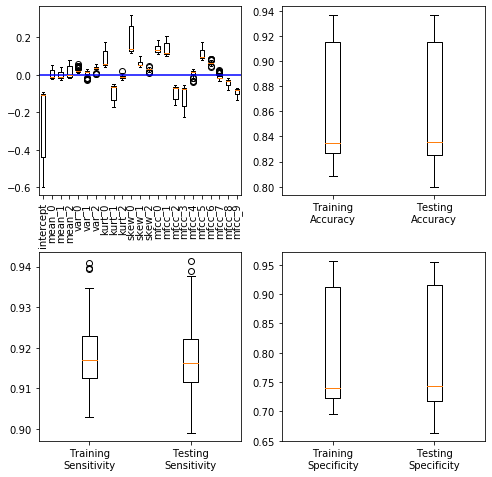

In [9]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# boxplot of the parameters
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(2, 2, 1)
ax.boxplot(params)
ax.axhline(y=0, c="b")
ax.set_xticklabels(["intercept"]+headers[2:], rotation = 90)


# boxplot of the scorings, grouped by type if possible
# reconfigure so that the 
ax = fig.add_subplot(2, 2, 2)
ax.boxplot(scores[:,[0,3]])
ax.set_xticklabels(["Training\nAccuracy", "Testing\nAccuracy"])

ax = fig.add_subplot(2, 2, 3)
ax.boxplot(scores[:,[1,4]])
ax.set_xticklabels(["Training\nSensitivity", "Testing\nSensitivity"])

ax = fig.add_subplot(2, 2, 4)
ax.boxplot(scores[:,[2,5]])
ax.set_xticklabels(["Training\nSpecificity", "Testing\nSpecificity"])

plt.subplots_adjust(hspace=0.3)
plt.savefig("lr.pdf")
plt.show()

### Threshold Selection
Use the training set for training, and validation set for selecting threshold

     pred_neg  pred_pos
neg         0      1044
pos         9       894
Sensitivity (Recall): 0.9900332225913622
Specificity         : 0.0


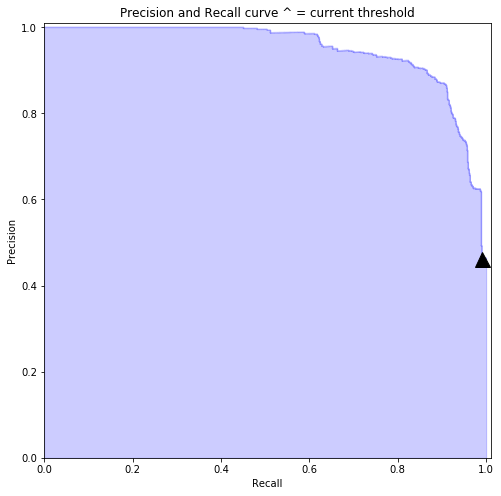

In [33]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, y_scores, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos'])
    print(cm)
    
    print("Sensitivity (Recall): {}".format(cm.loc["pos","pred_pos"]/(cm.loc["pos"].sum())))
    print("Specificity         : {}".format(cm.loc["neg","pred_neg"]/(cm.loc["neg"].sum())))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.0, 1.01]);
    plt.xlim([0.0, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
X_train, X_test = ml_train[headers[2:]], ml_val[headers[2:]]
y_train, y_test = np.where(ml_train[headers[0]]=="Danger",1,0), np.where(ml_val[headers[0]]=="Danger",1,0)
clf = LogisticRegression(random_state=0,
                            solver="sag").fit(X_train,y_train)
# get y_hat
y_hat = clf.predict_proba(X_test)[:, 1]

p, r, thresholds = precision_recall_curve(y_test, y_hat)

precision_recall_threshold(p, r, thresholds, y_hat, 0.198)

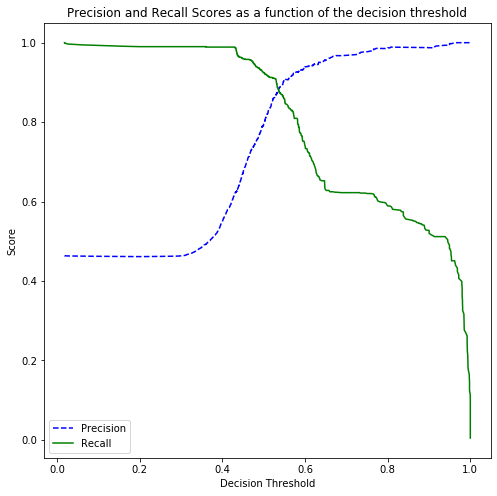

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')



plot_precision_recall_vs_threshold(p, r, thresholds)

Area under ROC curve: 0.9458085648943708


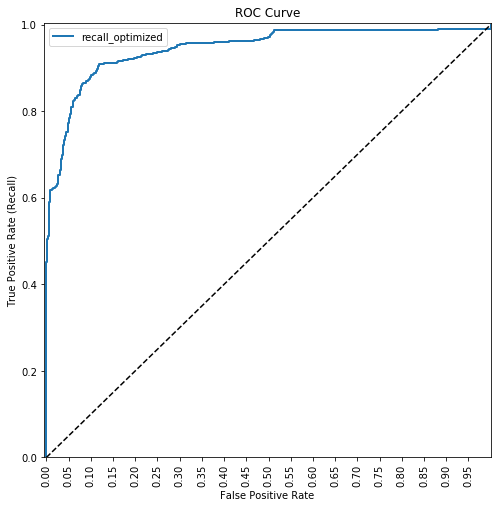

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

fpr, tpr, auc_thresholds = roc_curve(y_test, y_hat)
print("Area under ROC curve: {}".format(auc(fpr, tpr))) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

### Find the 99% Sensitivity Threshold

In [36]:
target_r = 0.95
t_opt = thresholds[np.argmin(np.abs(r-target_r))]
print("Threshold to achieve Sensitivity of {}: {}".format(target_r, t_opt))

Threshold to achieve Sensitivity of 0.95: 0.4766313720948629


### Test Set
We should see a sensitivity close to desired threshold and get realistic specificity values

     pred_neg  pred_pos
neg       787       185
pos        32       613
Sensitivity (Recall): 0.9503875968992248
Specificity         : 0.8096707818930041


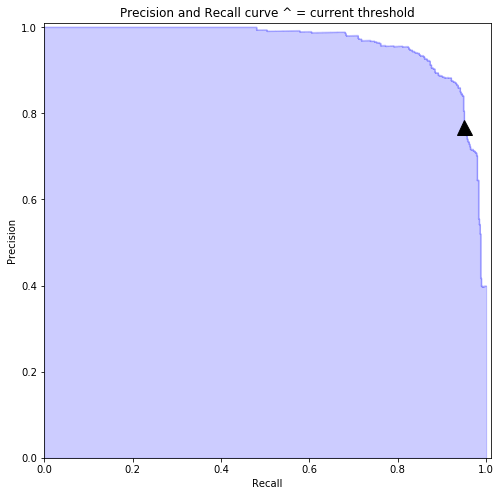

In [37]:
ml_train_val = pd.concat([ml_train, ml_val]) # use anything not in test set
X_train, X_test = ml_train_val[headers[2:]], ml_test[headers[2:]]
y_train, y_test = np.where(ml_train_val[headers[0]]=="Danger",1,0), np.where(ml_test[headers[0]]=="Danger",1,0)
clf = LogisticRegression(random_state=0,
                            solver="sag").fit(X_train,y_train)
# get y_hat
y_hat = clf.predict_proba(X_test)[:, 1]

p, r, thresholds = precision_recall_curve(y_test, y_hat)

precision_recall_threshold(p, r, thresholds, y_hat, t_opt)

### Save Model

In [40]:
import joblib
joblib.dump(clf, "n3060_basic.pkl")

['n3060_basic.pkl']

### Try Load Model and Perform Inference

In [41]:
model_clone = joblib.load("n3060_basic.pkl")
# get y_hat
y_hat = clf.predict_proba(X_test)[:, 1]

p, r, thresholds = precision_recall_curve(y_test, y_hat)

precision_recall_threshold(p, r, thresholds, y_hat, t_opt)